Reporting:
0. Iport and Clean data
1. What was the best month for sales? How much was earned that month?
2. What city has the best sales?
3. What time should we display ads to maximize the likelihood of customer’s buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

In [249]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly as px
import cufflinks as cf
cf.go_offline()


path='data/'
filepaths=[]

for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath=path+file
        df=pd.read_csv(filepath)
        filepaths.append(df)
        dt=pd.concat(filepaths)
dt

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<AxesSubplot:>

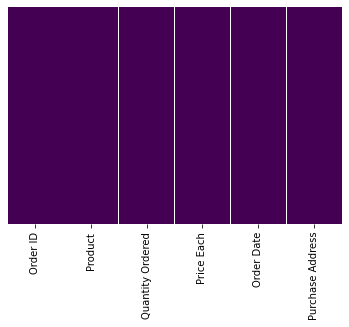

In [230]:
sns.heatmap(dt.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [233]:
dt.rename(columns={'Order Date':'Order_Date'}, inplace=True)
dt['Month']=dt['Order_Date'].str[0:2]
dt=dt.dropna(how='all')
dt=dt[dt['Month']!='Or']

1. What was the best month for sales? How much was earned that month?

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order_Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


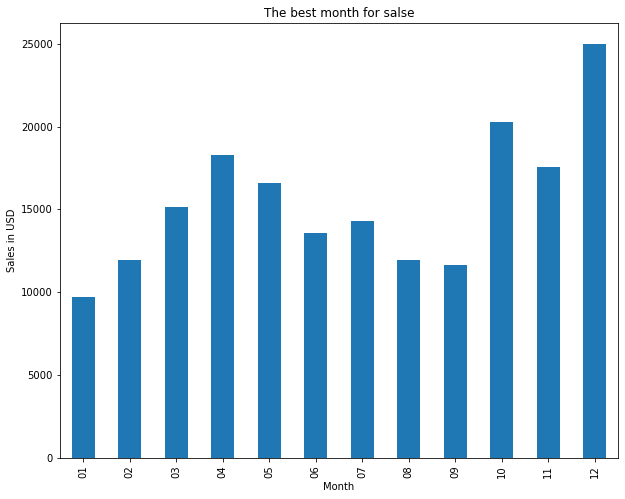

In [234]:
plt.figure(figsize=(10,8))
dt['Quantity Ordered']=pd.to_numeric(dt['Quantity Ordered'], downcast='integer')
dt['Price Each']=pd.to_numeric(dt['Price Each'], downcast='float')
dt['Sales']=dt['Quantity Ordered']*dt['Price Each']
move_column=dt.pop('Sales')
dt.insert(4,'Sales',move_column)
bymonth=dt.groupby('Month').count()
bymonth['Sales'].plot(kind='bar')

plt.title('The best month for salse')
plt.ylabel('Sales in USD')
dt.head()

2. What city has the best sales?

Text(0, 0.5, 'Sales in USD')

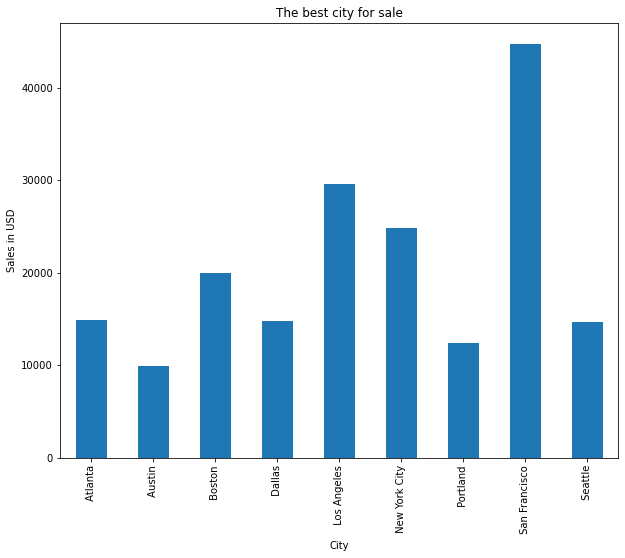

In [91]:
plt.figure(figsize=(10,8))
dt['City']=dt['Purchase Address'].apply(lambda address:address.split(',')[1])
byCity=dt.groupby(dt['City']).count()
byCity['Sales'].plot(kind='bar')

plt.title('The best city for sale')
plt.ylabel('Sales in USD')


3. What time should we display ads to maximize the likelihood of customer’s buying product?

In [154]:
dt['Order_Date'] = pd.to_datetime(dt['Order_Date'])
dt['Hours']=dt['Order_Date'].dt.hour

byhours=dt.groupby(dt['Hours']).count()['Sales']
byItem=dt.groupby(dt['Hours']).sum()['Quantity Ordered']


In [217]:
px.plot(byhours,kind='line')

Text(0, 0.5, 'Sales in Item')

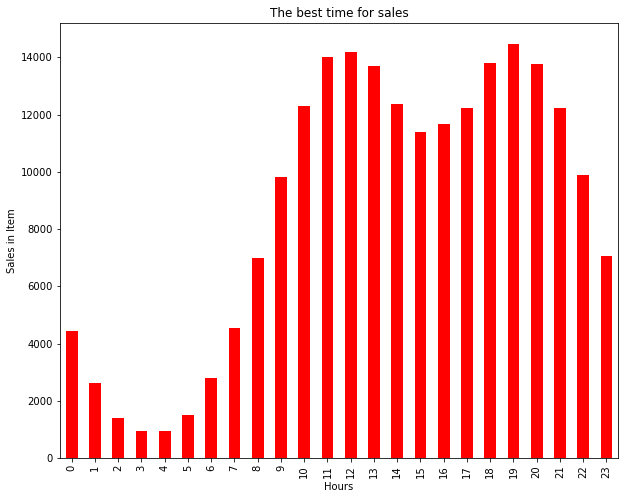

In [163]:
plt.figure(figsize=(10,8))
byItem.plot(kind='bar', color='red')
plt.title('The best time for sales')
plt.ylabel('Sales in Item')

4. What products are most often sold together?

In [194]:
dt_dup=dt[dt['Order ID'].duplicated(keep=False)]
groupP=lambda product:','.join(product)
dt_dup['All Products'] = dt_dup.groupby('Order ID')['Product'].transform(groupP)
dt_dup = dt_dup[['Order ID', 'All Products']].drop_duplicates()
dt_dup['All Products'].value_counts().head(10)

<ipython-input-194-a4029692b058>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_dup['All Products'] = dt_dup.groupby('Order ID')['Product'].transform(groupP)


iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: All Products, dtype: int64

5. What product sold the most? Why do you think it sold the most?

<ipython-input-248-4323900be40c>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 720x432 with 0 Axes>

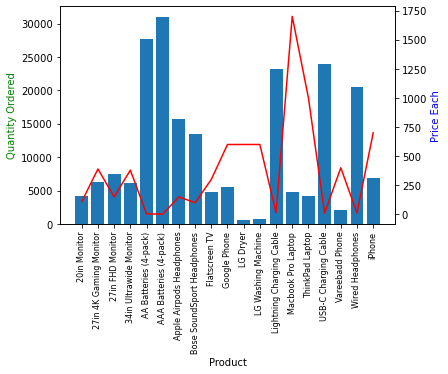

In [248]:
plt.figure(figsize=(10,6))
all_product=dt.groupby('Product').sum()['Quantity Ordered']
prices=dt.groupby('Product').mean()['Price Each']
x=[product for product, quant in all_product.items()]
fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(x,all_product)
ax2.plot(x,prices, color='r')
ax1.set_xticklabels(x,rotation=90,size=8)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b');